In [2]:
from pyrosm import OSM
from pyrosm import get_data
import geopandas as gpd

/Users/jibi/dev_projects/mobitopp/mobitopp-preprocessing/venv/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
path = "/Users/jibi/dev_projects/mobitopp/mobitopp-preprocessing/data/osm/pbf_files/karlsruhe-regbez-210614.osm.pbf"
osm = OSM(path)

print("Type of 'osm' instance: ", type(osm))

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


In [4]:
buildings = osm.get_buildings()
#buildings.set_index('id', inplace=True)
buildings.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,5,None,None,None,Babostraße,None,Konferenzhaus,None,...,bing,None,None,3428357,1556048585,11,None,way,"POLYGON ((8.67006 49.54737, 8.67004 49.54762, ...",NaN
1,Karlsruhe,DE,10,None,None,None,Henriette-Obermüller-Straße,None,Bürgerzentrum Südstadt,None,...,"Maps4BW, LGL, www.lgl-bw.de",None,None,4050982,1606664995,11,"{""alt_name"":""S\u00FCdwerk"",""opening_hours:sign...",way,"POLYGON ((8.41366 49.00265, 8.41383 49.00305, ...",NaN
2,Karlsruhe,DE,22,None,76137,None,Nebeniusstraße,None,None,None,...,LA-KA,1902-10-15,None,4051001,1603297300,14,"{""roof:levels"":""1"",""roof:shape"":""hipped""}",way,"POLYGON ((8.40751 48.99721, 8.40751 48.99722, ...",NaN
3,None,None,21,None,None,None,Augartenstraße,None,Jugendzentrum Südstadt,None,...,None,None,None,4051006,1584212716,5,None,way,"POLYGON ((8.40656 48.99983, 8.40657 48.99968, ...",NaN
4,Karlsruhe,DE,50,None,76137,None,Augartenstraße,None,Unsere Liebe Frau,None,...,LA-KA;Bing,1892,None,4051009,1612031271,16,"{""architect"":""Franz Jakob Schmitt"",""denominati...",way,"POLYGON ((8.40881 48.99862, 8.40886 48.99862, ...",NaN


In [62]:
buildings.set_index('id', inplace=True)
buildings.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,shop,source,start_date,wikipedia,timestamp,version,tags,osm_type,geometry,changeset
id,,,,,,,,,,,,,,,,,,,,,
3428357,None,None,5,None,None,None,Babostraße,None,Konferenzhaus,None,...,None,bing,None,None,1556048585,11,None,way,"POLYGON ((4224745.421 2938045.311, 4224744.198...",NaN
4050982,Karlsruhe,DE,10,None,None,None,Henriette-Obermüller-Straße,None,Bürgerzentrum Südstadt,None,...,None,"Maps4BW, LGL, www.lgl-bw.de",None,None,1606664995,11,"{""alt_name"":""S\u00FCdwerk"",""opening_hours:sign...",way,"POLYGON ((4204908.236 2877857.979, 4204921.619...",NaN
4051001,Karlsruhe,DE,22,None,76137,None,Nebeniusstraße,None,None,None,...,None,LA-KA,1902-10-15,None,1603297300,14,"{""roof:levels"":""1"",""roof:shape"":""hipped""}",way,"POLYGON ((4204445.119 2877262.661, 4204445.273...",NaN
4051006,None,None,21,None,None,None,Augartenstraße,None,Jugendzentrum Südstadt,None,...,None,None,None,None,1584212716,5,None,way,"POLYGON ((4204381.673 2877555.120, 4204381.922...",NaN
4051009,Karlsruhe,DE,50,None,76137,None,Augartenstraße,None,Unsere Liebe Frau,None,...,None,LA-KA;Bing,1892,None,1612031271,16,"{""architect"":""Franz Jakob Schmitt"",""denominati...",way,"POLYGON ((4204543.779 2877416.797, 4204547.419...",NaN


In [63]:
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)
pois.set_index("id", inplace=True)


/Users/jibi/dev_projects/mobitopp/mobitopp-preprocessing/venv/lib/python3.9/site-packages/pyrosm/pois.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(nodes, node_coordinates, ways,
/Users/jibi/dev_projects/mobitopp/mobitopp-preprocessing/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  super(GeoDataFrame, self).__setitem__(key, value)


In [8]:
#type(pois.loc[1033439543,"geometry"])

In [64]:
buildings.head(5)

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,shop,source,start_date,wikipedia,timestamp,version,tags,osm_type,geometry,changeset
id,,,,,,,,,,,,,,,,,,,,,
3428357,None,None,5,None,None,None,Babostraße,None,Konferenzhaus,None,...,None,bing,None,None,1556048585,11,None,way,"POLYGON ((4224745.421 2938045.311, 4224744.198...",NaN
4050982,Karlsruhe,DE,10,None,None,None,Henriette-Obermüller-Straße,None,Bürgerzentrum Südstadt,None,...,None,"Maps4BW, LGL, www.lgl-bw.de",None,None,1606664995,11,"{""alt_name"":""S\u00FCdwerk"",""opening_hours:sign...",way,"POLYGON ((4204908.236 2877857.979, 4204921.619...",NaN
4051001,Karlsruhe,DE,22,None,76137,None,Nebeniusstraße,None,None,None,...,None,LA-KA,1902-10-15,None,1603297300,14,"{""roof:levels"":""1"",""roof:shape"":""hipped""}",way,"POLYGON ((4204445.119 2877262.661, 4204445.273...",NaN
4051006,None,None,21,None,None,None,Augartenstraße,None,Jugendzentrum Südstadt,None,...,None,None,None,None,1584212716,5,None,way,"POLYGON ((4204381.673 2877555.120, 4204381.922...",NaN
4051009,Karlsruhe,DE,50,None,76137,None,Augartenstraße,None,Unsere Liebe Frau,None,...,None,LA-KA;Bing,1892,None,1612031271,16,"{""architect"":""Franz Jakob Schmitt"",""denominati...",way,"POLYGON ((4204543.779 2877416.797, 4204547.419...",NaN


In [65]:
buildings['geometry'].groupby(buildings['geometry'].geom_type).count()

LineString               1
MultiLineString          3
MultiPolygon            39
Polygon            1092750
Name: geometry, dtype: int64

In [66]:
len(buildings)

1092793

In [70]:
pois.to_crs(epsg=3035, inplace=True)
buildings.to_crs(epsg=3035, inplace=True)
# gpd.sjoin(buildings, pois,)

In [71]:
# check if crs are identical
print(pois.crs)
print(buildings.crs)


epsg:3035
epsg:3035


In [69]:
joined_left = gpd.sjoin(pois, buildings, how="left", op="within")


In [85]:
joined_inner = gpd.sjoin(buildings, pois, how="inner", op="contains")

In [74]:
joined_left['geometry'].groupby(joined_left['geometry'].geom_type).count()

LineString            44
MultiLineString       31
MultiPolygon          48
Point              84974
Polygon            39395
Name: geometry, dtype: int64

In [86]:
joined_inner['geometry'].groupby(joined_inner['geometry'].geom_type).count()

MultiPolygon       43
Polygon         39890
Name: geometry, dtype: int64

In [87]:
buildings["geometry"].groupby(buildings["geometry"].geom_type).count()

LineString               1
MultiLineString          3
MultiPolygon            39
Polygon            1092750
Name: geometry, dtype: int64

In [72]:
joined_left.head(20)
joined_left["geometry"]

id
10467911                         POINT (4214869.328 2939219.080)
11293086                         POINT (4222214.404 2942151.926)
11325136                         POINT (4221940.457 2944956.890)
14580450                         POINT (4225420.609 2940724.158)
15230524                         POINT (4193222.918 2875476.565)
                                     ...                        
55790316378    POLYGON ((4204061.080 2878239.647, 4204061.439...
55802670987    MULTIPOLYGON (((4204045.050 2878394.029, 42040...
55839738964    MULTIPOLYGON (((4204141.677 2878326.264, 42041...
55864454415    MULTIPOLYGON (((4204079.761 2878336.326, 42040...
67545972047    POLYGON ((4206435.023 2887657.759, 4206437.019...
Name: geometry, Length: 124492, dtype: geometry

In [88]:
for col in joined_inner.columns:
    print(col)

addr:city_left
addr:country_left
addr:housenumber_left
addr:housename_left
addr:postcode_left
addr:place_left
addr:street_left
email_left
name_left
opening_hours_left
operator_left
phone_left
ref_left
url_left
website_left
building_left
amenity_left
building:flats
building:levels_left
building:material
building:max_level
building:min_level
building:use
craft_left
height
internet_access_left
landuse_left
levels
office_left
shop_left
source_left
start_date_left
wikipedia_left
timestamp_left
version_left
tags_left
osm_type_left
geometry
changeset_left
index_right
lon
timestamp_right
lat
tags_right
version_right
changeset_right
addr:city_right
addr:country_right
addr:full
addr:housenumber_right
addr:housename_right
addr:postcode_right
addr:place_right
addr:street_right
email_right
name_right
opening_hours_right
operator_right
phone_right
ref_right
url_right
website_right
amenity_right
atm
bicycle_parking
bar
biergarten
building_right
building:levels_right
cafe
car_repair
car_sharing
car_wa

In [53]:
joined_left["id"].head(20)

0     3428357
1     4050982
2     4051001
2     4051001
3     4051006
4     4051009
5     4058925
5     4058925
6     4058954
7     4058962
8     4058964
9     4234637
9     4234637
9     4234637
10    4408422
11    4425325
12    4425327
13    4425328
14    4425330
15    4425331
Name: id, dtype: int64

In [38]:
#pois.loc[pois["id"]== 4051001]
pois.head()

,lon,timestamp,lat,tags,version,changeset,addr:city,addr:country,addr:full,addr:housenumber,...,vacuum_cleaner,video,wholesale,geometry,osm_type,police,taxi,kiosk,water,wine
id,,,,,,,,,,,,,,,,,,,,,
10467911,8.533319,1587858255,49.556236,None,5,0.0,None,None,None,None,...,None,None,None,POINT (4214869.328 2939219.080),node,NaN,NaN,NaN,NaN,NaN
11293086,8.634061,1550915315,49.583878,None,4,0.0,None,None,None,None,...,None,None,None,POINT (4222214.404 2942151.926),node,NaN,NaN,NaN,NaN,NaN
11325136,8.629561,1325453562,49.609051,None,4,0.0,None,None,None,None,...,None,None,None,POINT (4221940.457 2944956.890),node,NaN,NaN,NaN,NaN,NaN
14580450,8.678735,1424110811,49.571568,None,2,0.0,None,None,None,None,...,None,None,None,POINT (4225420.609 2940724.158),node,NaN,NaN,NaN,NaN,NaN
15230524,8.254796,1568927009,48.978863,"{""cargo"":""passengers;vehicle"",""ferry"":""yes"",""w...",13,0.0,None,None,None,None,...,None,None,None,POINT (4193222.918 2875476.565),node,NaN,NaN,NaN,NaN,NaN


In [61]:
pois.loc[10467911]


lon            8.533319
timestamp    1587858255
lat           49.556236
tags               None
version               5
                ...    
police              NaN
taxi                NaN
kiosk               NaN
water               NaN
wine                NaN
Name: 10467911, Length: 108, dtype: object

In [89]:
joined_inner.head()

,addr:city_left,addr:country_left,addr:housenumber_left,addr:housename_left,addr:postcode_left,addr:place_left,addr:street_left,email_left,name_left,opening_hours_left,...,trailer,vacuum_cleaner,video,wholesale,osm_type_right,police,taxi,kiosk,water,wine
id,,,,,,,,,,,,,,,,,,,,,
4050982,Karlsruhe,DE,10,None,None,None,Henriette-Obermüller-Straße,None,Bürgerzentrum Südstadt,None,...,None,NaN,NaN,None,way,None,None,None,None,None
4051001,Karlsruhe,DE,22,None,76137,None,Nebeniusstraße,None,None,None,...,None,None,None,None,node,NaN,NaN,NaN,NaN,NaN
4051001,Karlsruhe,DE,22,None,76137,None,Nebeniusstraße,None,None,None,...,None,None,None,None,node,NaN,NaN,NaN,NaN,NaN
4051006,None,None,21,None,None,None,Augartenstraße,None,Jugendzentrum Südstadt,None,...,None,NaN,NaN,None,way,None,None,None,None,None
4051009,Karlsruhe,DE,50,None,76137,None,Augartenstraße,None,Unsere Liebe Frau,None,...,None,NaN,NaN,None,way,None,None,None,None,None


In [90]:
joined_inner["geometry"]

id
4050982        POLYGON ((4204908.236 2877857.979, 4204921.619...
4051001        POLYGON ((4204445.119 2877262.661, 4204445.273...
4051001        POLYGON ((4204445.119 2877262.661, 4204445.273...
4051006        POLYGON ((4204381.673 2877555.120, 4204381.922...
4051009        POLYGON ((4204543.779 2877416.797, 4204547.419...
                                     ...                        
51546522685    POLYGON ((4205206.417 2903499.384, 4205206.654...
52758421047    POLYGON ((4239143.363 2904825.181, 4239132.172...
52758421047    POLYGON ((4239143.363 2904825.181, 4239132.172...
52758421047    POLYGON ((4239143.363 2904825.181, 4239132.172...
60888510721    POLYGON ((4184277.644 2843697.042, 4184262.331...
Name: geometry, Length: 39933, dtype: geometry

In [91]:
joined_inner["index_right"].head()

id
4050982       4050982
4051001    7192820096
4051001    7192820097
4051006       4051006
4051009       4051009
Name: index_right, dtype: int64

In [98]:
pois.loc[7192820096]

lon                                                   8.408002
timestamp                                           1581069676
lat                                                  48.997074
tags         {"school:de":"Realschule","wheelchair":"no","i...
version                                                      1
                                   ...                        
police                                                     NaN
taxi                                                       NaN
kiosk                                                      NaN
water                                                      NaN
wine                                                       NaN
Name: 7192820096, Length: 108, dtype: object

In [94]:
pois.loc[7192820097]

lon                                                   8.407283
timestamp                                           1581069676
lat                                                  48.997135
tags         {"school:de":"Grundschule","wheelchair":"no","...
version                                                      1
                                   ...                        
police                                                     NaN
taxi                                                       NaN
kiosk                                                      NaN
water                                                      NaN
wine                                                       NaN
Name: 7192820097, Length: 108, dtype: object

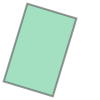

In [100]:
pois["geometry"].loc[4050982]

In [101]:
joined_inner["area"] = joined_inner.geometry.area
joined_inner["area"]

id
4050982        1339.201003
4051001        1777.812107
4051001        1777.812107
4051006         281.204026
4051009        1124.397287
                  ...     
51546522685     836.953242
52758421047     761.986260
52758421047     761.986260
52758421047     761.986260
60888510721    3578.114449
Name: area, Length: 39933, dtype: float64

In [109]:
liechtenstein = "/Users/jibi/dev_projects/mobitopp/mobitopp-preprocessing/data/osm/pbf_files/liechtenstein-140101.osm.pbf"
osm = OSM(liechtenstein)
custom = {"amenity":["fuel"]}
fuel_pois = osm.get_pois(custom_filter=custom,)

In [110]:
fuel_pois.head(30)
fuel_pois.set_index("id",inplace=True)
fuel_pois

,lon,timestamp,lat,tags,version,changeset,name,operator,amenity,source,geometry,osm_type,building
id,,,,,,,,,,,,,
336434980,9.514322,1309015444,47.145451,None,2,0.0,None,Agip,fuel,None,POINT (9.51432 47.14545),node,NaN
413753834,9.526543,1373818323,47.207912,"{""wheelchair"":""limited""}",4,0.0,None,coop,fuel,None,POINT (9.52654 47.20791),node,NaN
452382145,9.523293,1249024335,47.124493,None,1,0.0,None,Shell,fuel,None,POINT (9.52329 47.12449),node,NaN
572519925,9.521694,1309011989,47.132542,"{""brand"":""Toyota"",""shop"":""car_repair""}",2,0.0,None,None,fuel,None,POINT (9.52169 47.13254),node,NaN
757459268,9.548445,1275174883,47.206196,"{""brand"":""Shell""}",1,0.0,None,Shell,fuel,None,POINT (9.54844 47.20620),node,NaN
757459271,9.548635,1275174884,47.206108,"{""brand"":""Shell""}",1,0.0,None,Shell,fuel,None,POINT (9.54864 47.20611),node,NaN
984721479,9.520282,1335178784,47.125275,"{""ele"":""460"",""fuel:1_25"":""no"",""fuel:1_50"":""no""...",2,0.0,"Vaduz, Gastankstelle",PAG,fuel,"Bundesamt für Verkehr (BAV), DIDOK 2009",POINT (9.52028 47.12527),node,NaN
1082912882,9.514998,1315851492,47.209564,None,2,0.0,None,None,fuel,None,POINT (9.51500 47.20956),node,NaN
1082912904,9.544994,1303511069,47.201084,None,2,0.0,None,BP,fuel,None,POINT (9.54499 47.20108),node,NaN


In [13]:
buildings.head(30)

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,5,None,None,None,Babostraße,None,Konferenzhaus,None,...,bing,None,None,3428357,1556048585,11,None,way,"POLYGON ((8.67006 49.54737, 8.67004 49.54762, ...",NaN
1,Karlsruhe,DE,10,None,None,None,Henriette-Obermüller-Straße,None,Bürgerzentrum Südstadt,None,...,"Maps4BW, LGL, www.lgl-bw.de",None,None,4050982,1606664995,11,"{""alt_name"":""S\u00FCdwerk"",""opening_hours:sign...",way,"POLYGON ((8.41366 49.00265, 8.41383 49.00305, ...",NaN
2,Karlsruhe,DE,22,None,76137,None,Nebeniusstraße,None,None,None,...,LA-KA,1902-10-15,None,4051001,1603297300,14,"{""roof:levels"":""1"",""roof:shape"":""hipped""}",way,"POLYGON ((8.40751 48.99721, 8.40751 48.99722, ...",NaN
3,None,None,21,None,None,None,Augartenstraße,None,Jugendzentrum Südstadt,None,...,None,None,None,4051006,1584212716,5,None,way,"POLYGON ((8.40656 48.99983, 8.40657 48.99968, ...",NaN
4,Karlsruhe,DE,50,None,76137,None,Augartenstraße,None,Unsere Liebe Frau,None,...,LA-KA;Bing,1892,None,4051009,1612031271,16,"{""architect"":""Franz Jakob Schmitt"",""denominati...",way,"POLYGON ((8.40881 48.99862, 8.40886 48.99862, ...",NaN
5,Karlsruhe,None,1,None,76137,None,Hermann-Levi-Platz,None,Badisches Staatstheater,None,...,None,1975-08-29,de:Badisches Staatstheater Karlsruhe,4058925,1575304123,30,"{""note"":""Adresse am 01.02.2017 von Baumeisters...",way,"POLYGON ((8.40692 49.00434, 8.40702 49.00429, ...",NaN
6,Karlsruhe,DE,13,None,76133,None,Erbprinzenstraße,None,None,None,...,None,1872,None,4058954,1603124440,23,"{""architect"":""Karl Joseph Berckm\u00FCller"",""h...",way,"POLYGON ((8.40025 49.00700, 8.40022 49.00697, ...",NaN
7,None,None,None,None,None,None,None,None,Nymphengartenpavillon,None,...,None,1964,None,4058962,1603302356,9,"{""building:part"":""yes"",""roof:shape"":""flat"",""so...",way,"POLYGON ((8.39978 49.00691, 8.40030 49.00675, ...",NaN
8,Karlsruhe,DE,16,None,76133,None,Erbprinzenstraße,None,St. Stephan,None,...,None,1814,de:St. Stephan (Karlsruhe),4058964,1573330898,16,"{""alt_name"":""Pfarrkirche St. Stephan"",""religio...",way,"POLYGON ((8.39947 49.00845, 8.39952 49.00852, ...",NaN
9,Karlsruhe,DE,15,None,76133,None,Erbprinzenstraße,None,Badische Landesbibliothek,Mo-Fr 09:00-19:00; Sa 10:00-18:00,...,http://www.blb-karlsruhe.de/blb/blbhtml/org/im...,1992-01,de:Badische Landesbibliothek,4234637,1526648960,22,"{""name:sk"":""B\u00E1densk\u00E1 krajinsk\u00E1 ...",way,"POLYGON ((8.39909 49.00733, 8.39840 49.00754, ...",NaN


In [22]:
buildings.loc[10]["building:levels"]

In [24]:
buildings["building:levels"].dropna()

2          3
7          2
8          4
9          3
11         2
          ..
1092742    6
1092769    1
1092771    2
1092779    4
1092785    1
Name: building:levels, Length: 62696, dtype: object

In [26]:
buildings.loc[1092742]

addr:city                                                          None
addr:country                                                       None
addr:housenumber                                                   None
addr:housename                                                     None
addr:postcode                                                      None
addr:place                                                         None
addr:street                                                        None
email                                                              None
name                                                              No. 1
opening_hours                                                      None
operator                                                           None
phone                                                              None
ref                                                                None
url                                                             

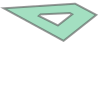

In [27]:
buildings.loc[1092742]["geometry"]